Paquetes necesarios:

***1 TAREA :*** Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import copy

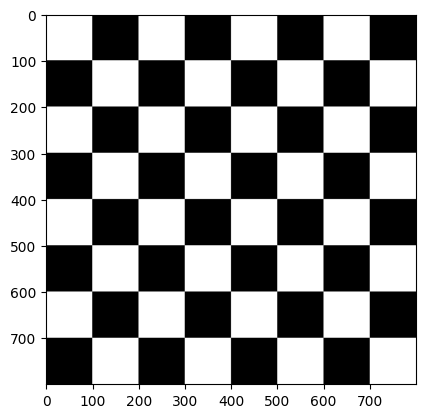

In [39]:
# Dimensiones imagen
ancho = 800
alto = 800

# Crear imagen
img_ajedrez = np.zeros((ancho,alto,1), dtype = np.uint8)

# Crear los cuadrados blancos
for fila in range(100, 900, 100):
    if (fila/100)%2==0:
        for columna in range(100, 900, 200):
            img_ajedrez[columna:columna+100,fila-100:fila,0] = 255
    else:
        for columna in range(0, 900, 200):
            img_ajedrez[columna:columna+100,fila-100:fila,0] = 255
        
# Mostrar el tablero de ajedrez
plt.imshow(img_ajedrez, cmap='gray')
plt.show()



***2 TAREA:*** Crear una imagen estilo Mondrian

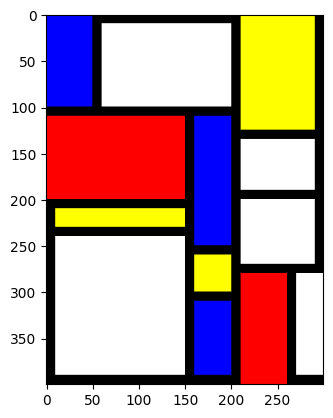

In [76]:
# Crea una imagen con tres planos
img_Mondrian = np.zeros((400,300,3), dtype = np.uint8)

# Azules
img_Mondrian[0:100, 0:50, 2] = 255
img_Mondrian[110:250, 160:200, 2] = 255
img_Mondrian[310:390, 160:200, 2] = 255

# Blanco
for index in range(0,3):
    img_Mondrian[10:100, 60:200, index] = 255
    img_Mondrian[135:190, 210:290, index] = 255
    img_Mondrian[200:270, 210:290, index] = 255
    img_Mondrian[240:390, 10:150, index] = 255
    img_Mondrian[280:390, 270:300, index] = 255

# Amarillo
img_Mondrian[0:125, 210:290, 0] = 255
img_Mondrian[0:125, 210:290, 1] = 255

img_Mondrian[210:230, 10:150, 0] = 255
img_Mondrian[210:230, 10:150, 1] = 255

img_Mondrian[260:300, 160:200, 0] = 255
img_Mondrian[260:300, 160:200, 1] = 255

# Rojo
img_Mondrian[110:200, 0:150, 0] = 255
img_Mondrian[280:400, 210:260, 0] = 255



# Visualiza 
plt.imshow(img_Mondrian) 
plt.show()

***3 Ejercicio*** Hacer uso de las funciones de dibujo de OpenCV

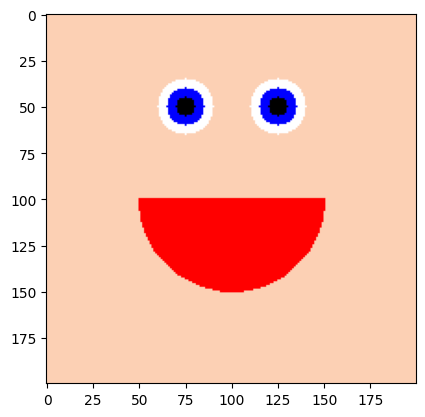

In [17]:

#Crea una imagen con tres planos
dibujo_img = np.zeros((200,200,3), dtype = np.uint8)

# Piel
cv2.rectangle(dibujo_img,(0,0),(200,200),(252, 208, 180),-1)

# Ojo izquierdo
cv2.circle(dibujo_img,(75,50), 15, (255,255,255), -1)
cv2.circle(dibujo_img,(75,50), 10, (0,0,255), -1)
cv2.circle(dibujo_img,(75,50), 5, (0,0,0), -1)

# Ojo derecho
cv2.circle(dibujo_img,(125,50), 15, (255,255,255), -1)
cv2.circle(dibujo_img,(125,50), 10, (0,0,255), -1)
cv2.circle(dibujo_img,(125,50), 5, (0,0,0), -1)

# Boca
cv2.ellipse(dibujo_img,(100,100),(50,50),0,0,180,255,-1)

#Visualiza sin especificar el mapa de color gris
plt.imshow(dibujo_img) 
plt.show()


***4 Ejercicio*** Modificar un plano de la imagen

In [10]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Canal verde invertido
        frame[:,:,1] = 255 - frame[:,:,1]
        
        # Muestra resultado
        cv2.imshow('Cam3',frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

***5 Ejercicio*** Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [11]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Dimensiones
        h, w, c = frame.shape

        punto_oscuro=(0,0)
        punto_claro=(0,0)

        frame_copy=copy.copy(frame)
        frame_copy = cv2.cvtColor(frame_copy, cv2.COLOR_BGR2GRAY)

        for x in range(0, h):
            for y in range(0,w):
                if frame_copy[x,y] > frame_copy[punto_claro[0], punto_claro[1]]:
                    punto_claro=(x,y)
                if frame_copy[x,y] < frame_copy[punto_oscuro[0], punto_oscuro[1]]:
                    punto_oscuro=(x,y)

        # Pixel más claro en rosa
        cv2.circle(frame,punto_claro, 5, (255,0,255), 2)
        
        # Pixel más oscuro en verde
        cv2.circle(frame,punto_oscuro, 5, (0,255,0), 2)

        # Muestra resultado
        cv2.imshow('Cam3',frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

***6 Ejercicio*** Hacer una propuesta pop art con la entrada de la cámara web o vídeo

In [12]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]
bl=bl[::-1]
tr=tr[::-1]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos
        tl[:,:,0] = b * 2
        tl[:,:,1] = g + 42
        tl[:,:,2] = r - 55

        tr[:,:,0] = 255 - r
        tr[:,:,1] = g + 10
        tr[:,:,2] = b - 20
        
        bl[:,:,0] = r + 50
        bl[:,:,1] = 100 - b
        bl[:,:,2] = g

        br[:,:,0] = b
        br[:,:,1] = g + 50
        br[:,:,2] = 100 - r

        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()